引入需要的包

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

定义所需函数

In [2]:
# 定义检测相应字符串所在列的函数
def chack_str(dfcs, chack_str):
    chack_setting = dfcs.keys()
    for chack_col in chack_setting:
        ch_dfcs = dfcs[dfcs[chack_col] == chack_str]
        if(ch_dfcs.shape[0]>0):
            print("\n",chack_col,"是目标列")
            
#定义检测列中最大最小值是否相等，并确定是否删除的函数（默认不删除）
def del_maxmin(dfdm, del_enter = False):
    del_setting = dfdm.keys()
    for del_col in del_setting:
        if(max(dfdm[del_col]) == min(dfdm[del_col])):
            print("\n",del_col,"是目标列")
            if(del_enter):
                dfdm = dfdm.drop(columns = [del_col])
    return dfdm
                
#定义一个函数方便将数据进行二分化
def set_features(dfsf, tfvalue = False):
    for feature_name in dfsf.keys():
        if(tfvalue):
            dfsf.loc[(dfsf[feature_name].notnull()), feature_name] = 1
        dfsf.loc[(dfsf[feature_name].isnull()), feature_name] = 0
    return dfsf
#定义一个函数用于区分空值和非空值
def creat_featrures(dfcf):
    for feature_name in dfcf.keys():
#        print(dfcf[feature_name].isnull().any())
#        print(dfcf[dfcf[feature_name] == 0].shape[0]>0)
        if((dfcf[feature_name].isnull().any())and(dfcf[dfcf[feature_name] == 0].shape[0]>0)):
            print("\n",feature_name,"是目标列")
            col_name = list(dfcf.columns)
            col_name.insert(col_name.index(feature_name)+1,feature_name+'为非空')
            dfcf = dfcf.reindex(columns = col_name, fill_value = 0)
            dfcf.loc[(dfcf[feature_name].notnull()),feature_name+'为非空'] = 1
    return dfcf

# 绘制Feature importance图像
def plot_feature_importances_cancer(model):
    n_features = Year.shape[1]
    plt.figure(figsize = (15,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
#     plt.yticks(np.arange(n_features), Year.keys())
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

# 定义一个移动数据集列的函数
def set_important_feature(dfsif ,array):
    dfsif_keys = np.array(dfsif.keys())
    j = 0
    for i in range(0,len(array[0])):
        columnsName = list(dfsif.columns)
        if(((array[0][i] != 0) and (array[0][i] != 1)) and (array[0][i] != 2)):
            l, n = 3+j, columnsName.index(dfsif_keys[array[0][i]])
            columnsName[l], columnsName[n] = columnsName[n],columnsName[l]
            dfsif = dfsif[columnsName]
            j = j + 1
    return dfsif

# 删除第一年的是否高送转标记
def del_first_row(dfdfr, array):
    j = 0
    dfdfr = dfdfr.drop(j)
    for i in range(0,len(array) - 1):
        dfdfr = dfdfr.drop(j + array[i])
        j = j + array[i]
    return dfdfr

# 删除最后一年的数据
def del_last_row(dfdlr, array):
    j = 0
    for i in range(0,len(array)):
        dfdlr = dfdlr.drop(j + array[i] - 1)
        j = j + array[i]
    return dfdlr

读取年、日数据

In [3]:
#==========================================================================================
#读取年数据
data_year = pd.read_csv('年数据1.csv' , encoding='GBK')
#data_year.info(verbose=True, null_counts=True)
#print(data_year.head())
#==========================================================================================
#读取日数据
data_day = pd.read_csv('日数据1.csv' , encoding='GBK')
#data_year.info(verbose=True, null_counts=True)
#print(data_year.head())
#==========================================================================================
#读取第八年数据
data_year2 = pd.read_csv('年数据2.csv' , encoding='GBK')
#data_year.info(verbose=True, null_counts=True)
#print(data_year.head())
#==========================================================================================
#读取第八年日数据
data_day2 = pd.read_csv('日数据2.csv' , encoding='GBK')
#data_year.info(verbose=True, null_counts=True)
#print(data_year.head())

选择年日数据

In [4]:
#选择年数据集
Year = data_year.iloc[:, 0:357]
#选择日数据集
Day = data_day
#选择第八年年数据集
Year2 = data_year2.iloc[:, 0:357]
#选择第八年日数据集
Day2 = data_day2

对日数据进行处理

In [5]:
Day = Day.groupby(['股票编号','年']).sum()
Day2 = Day2.groupby(['股票编号','年']).sum()

将日、年数据进行连接

In [6]:
Year = pd.merge(Year, Day, left_on = ['股票编号', '年份（年末）'], right_on = ['股票编号', '年'])
Year2 = pd.merge(Year2, Day2, left_on = ['股票编号', '年份（年末）'], right_on = ['股票编号', '年'])#年数据在左，日数据在右，左右拼接
Year=pd.concat([Year,Year2])#上下拼接

查看拼接后的年数据

In [7]:
Year

,股票编号,年份（年末）,固定资产合计,无息流动负债_x,无息非流动负债_x,带息流动负债,带息债务,净债务_x,有形净资产,营运资本,...,每股息税前利润,每股营业利润,每股盈余公积金,每股未分配利润,每股现金流量净额,每股股利,每股企业自由现金流量,每股经营活动产生的现金流量净额,每股留存收益,每股股东自由现金流量
0,1,1,8.691229e+07,1.422495e+09,1.600192e+08,8.198551e+08,8.271884e+08,3.578747e+08,8.929308e+08,5.904970e+08,...,0.0000,7.3253,66.7730,237.2469,80.8432,12.200000,-36.0909,21.8193,24.4651,0.0000
1,1,2,7.887817e+07,1.903724e+09,1.487364e+08,3.749099e+08,3.942266e+08,-4.034978e+08,1.190906e+09,9.114353e+08,...,0.0000,9.6308,73.3929,285.2815,-88.7873,12.150000,-1.1181,28.6699,37.4407,0.0000
2,1,3,7.530102e+07,1.447218e+09,1.418316e+08,3.643167e+08,4.805600e+08,-4.966118e+08,1.501162e+09,1.333070e+09,...,0.0000,13.0331,77.4970,329.9362,-24.5179,11.900000,-122.8240,76.9167,56.3411,0.0000
3,1,4,6.406923e+07,1.388840e+09,1.367301e+08,1.050000e+08,2.826134e+08,-5.263500e+08,1.755344e+09,1.697810e+09,...,0.0000,24.6267,80.6803,372.0430,-30.9223,16.775000,-111.5850,93.4055,108.8255,0.0000
4,1,5,8.592952e+07,1.870206e+09,1.347049e+08,1.292434e+08,2.740834e+08,-6.716566e+08,1.764907e+09,1.665822e+09,...,0.0000,28.5279,79.4074,367.9911,45.7792,18.300000,-39.7972,81.4511,135.8320,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,3462,8,7.621173e+09,2.250415e+09,1.570645e+08,2.743527e+09,3.770796e+09,2.273351e+09,7.055925e+09,5.041279e+08,...,122.0213,94.4762,115.0021,668.8884,-15.5570,36.059000,158.5956,208.9775,783.8905,18.1304
3462,3463,8,1.104456e+09,9.644326e+08,4.096932e+08,4.759984e+08,4.759984e+08,-2.521422e+08,2.546700e+09,1.765427e+09,...,116.3991,106.7299,37.5363,246.6573,3.1651,10.441728,-34.8242,-20.0027,284.1936,-8.5700
3463,3464,8,2.307674e+10,8.606397e+09,3.266281e+09,3.296668e+10,3.464768e+10,2.531838e+10,-2.770967e+08,-2.239309e+10,...,200.0129,79.1706,92.7447,190.8199,-25.1561,6.075000,4.7430,89.4769,283.5719,-108.1654
3464,3465,8,NaN,NaN,NaN,NaN,NaN,NaN,1.790000e+11,NaN,...,0.0000,228.0247,156.9310,655.7897,-209.6617,63.589000,0.0000,175.3260,812.7207,0.0000


对年数据进行处理，删去空值过多的行和列，删去值为相同字符串的列

In [8]:
Year = pd.concat([Year,pd.concat([data_year.iloc[:, 361],data_year2.iloc[:, 361]])],axis=1)
#检查字符串所在列
# chack_str(Year,'CNY')

#删除一些不重要的行和列
Year = Year.drop(columns=['会计准则', '货币代码'])

#返回最大值与最小值相同的列，并确定删除
Year = del_maxmin(Year, True)
print("返回最大值与最小值相同的列，并确定删除")

#保留至少有10%非空值的列和至少有20%非空值的行
Year = Year.dropna(axis=0,thresh = Year.shape[1]*0.2)
Year = Year.dropna(axis=1,thresh = Year.shape[0]*0.1)
print("保留至少有10%非空值的列和至少有20%非空值的行")
# 将'是否高转送'分离
year_t = Year['是否高转送']
Year = Year.iloc[:, 0:Year.shape[1]-1]

#将列的是否为空转化为新的特征
Year = creat_featrures(Year)
print("将列的是否为空转化为新的特征")

#将部分特征二值化
Year = set_features(Year)
print("将部分特征二值化")

# 将列名存储
Year_keys = Year.keys()

Year = Year.values
#将数据进行标准化
scaler = preprocessing.StandardScaler()
scaler.fit(Year[:, 2:Year.shape[1]])
Year[:, 2:Year.shape[1]] = scaler.transform(Year[:, 2:Year.shape[1]])
print(Year.shape)
print("将数据进行标准化")

#将数据进行规模化
min_max_scaler =  preprocessing.MinMaxScaler()
Year[:, 2:Year.shape[1]] = min_max_scaler.fit_transform(Year[:, 2:Year.shape[1]])

# =============================================================================
# #处理数据nan用均值填补
# simpleimputer = SimpleImputer(np.NaN, "mean")
# simpleimputer = simpleimputer.fit(Year[:, 2:Year.shape[1]])
# Year[:, 2:Year.shape[1]] = simpleimputer.transform(Year[:, 2:Year.shape[1]])
# =============================================================================

# 重新转化为DataFrame
Year = pd.DataFrame(Year)
# 重新生成行索引，并将原来的行索引删除
Year = Year.reset_index(drop = True)
year_t = year_t.reset_index(drop = True)
# 重新对DataFrame设定列名
Year.columns = Year_keys


 合并标志，1-合并，2-母公司 是目标列
返回最大值与最小值相同的列，并确定删除
保留至少有10%非空值的列和至少有20%非空值的行

 固定资产合计 是目标列

 无息非流动负债_x 是目标列

 带息流动负债 是目标列

 带息债务 是目标列

 毛利_x 是目标列

 非经常性损益 是目标列

 基本每股收益_x 是目标列

 稀释每股收益_x 是目标列

 每股营业总收入(元/股) 是目标列

 每股营业收入(元/股) 是目标列

 每股营业利润(元/股) 是目标列

 每股资本公积(元/股) 是目标列

 每股盈余公积(元/股) 是目标列

 每股留存收益(元/股) 是目标列

 每股现金流量净额(元/股) 是目标列

 每股企业自由现金流量(元/股) 是目标列

 每股股东自由现金流量(元/股) 是目标列

 归属于母公司净利润（扣除）同必增长(%) 是目标列

 基本每股收益同必增长(%) 是目标列

 稀释每股收益同必增长(%) 是目标列

 净资产收益率（摊薄）同必增长(%) 是目标列

 经营活动产生的现金流量净额同必增长(%) 是目标列

 每股经营活动产生的现金流量净额同必增长(%) 是目标列

 每股净资产相对年初增长(%) 是目标列

 净资产收益率(加权平均，%) 是目标列

 净资产收益率(扣除加权平均，%) 是目标列

 固定资产周转率(次) 是目标列

 固定资产合计周转率(次) 是目标列

 流动资产周转率(次) 是目标列

 总资产周转率(次) 是目标列

 存货周转率(次) 是目标列

 应收账款周转率(次) 是目标列

 应收账款周转天数(天/次) 是目标列

 营业周期(天/次) 是目标列

 应付账款周转率(次) 是目标列

 非筹资性现金流量净额/流动负债 是目标列

 非筹资性现金流量净额/负债总额 是目标列

 非流动负债与营运资金必率 是目标列

 应收账款/营业收入(%) 是目标列

 预收款项/营业收入(%) 是目标列

 投资活动产生的现金流量净额占必(%) 是目标列

 筹资活动产生的现金流量净额占必(%) 是目标列

 营业税金及附加/营业总收入(%) 是目标列

 销售费用/营业总收入(%) 是目标列

 资产减值损失/营业总收入(%) 是目标列

 经营活动净收益/营业总收入(%) 是目标列


选出年份为8的数据，将1-7年的数据与2-8年是否高转送选出

In [9]:
yuce = Year[Year['年份（年末）'] == 8]

Yearshape=Year.shape[0]
Year = Year.iloc[0:(Yearshape-yuce.shape[0]), :]
year_t = year_t.iloc[0:(Yearshape-yuce.shape[0]),]

del_row_array = np.array(Year.groupby(['股票编号']).count()['年份（年末）'])

year_t = del_first_row(year_t, del_row_array)
Year = del_last_row(Year, del_row_array)

为了方便之后数据集的拼接，重新生成索引

In [10]:
# 重新生成索引，并将原来的索引删除
Year = Year.reset_index(drop = True)
year_t = year_t.reset_index(drop = True)
yuce = yuce.reset_index(drop = True)

筛选出Feature importance大于0.001的Feature，并切割数据集


选中的特征为： ['股票编号' '年份（年末）' '无息流动负债_x' '无息非流动负债_x' '带息流动负债' '带息债务' '有形净资产' '净营运资本_x'
 '留存收益_x' '毛利_x' '经营活动净收益' '净利息费用' '息税前利润_x' '息前税后利润_x' '非经常性损益'
 '扣除非经常性损益后的归属于上市公司股东的净利润' '股权自由现金流量' '每股收益(期末摊薄，元/股)' '基本每股收益_x'
 '稀释每股收益_x' '每股净资产(元/股)' '每股营业总收入(元/股)' '每股营业利润(元/股)' '每股息税前利润(元/股)'
 '每股资本公积(元/股)' '每股盈余公积(元/股)' '每股公积金(元/股)' '每股未分配利润(元/股)' '每股留存收益(元/股)'
 '每股现金流量净额(元/股)' '每股企业自由现金流量(元/股)' '每股股东自由现金流量(元/股)' '营业总收入同必增长(%)'
 '营业收入同必增长(%)' '营业利润同必增长(%)' '营业总额同必增长(%)' '归属于母公司净利润同必增长(%)'
 '归属于母公司净利润（扣除）同必增长(%)' '基本每股收益同必增长(%)' '基本每股收益同必增长(%)为非空' '稀释每股收益同必增长(%)'
 '净资产收益率（摊薄）同必增长(%)' '经营活动产生的现金流量净额同必增长(%)' '每股经营活动产生的现金流量净额同必增长(%)'
 '总资产相对年初增长(%)' '净资产相对年初增长(%)' '归属于母公司的股东权益相对年初增长(%)' '每股净资产相对年初增长(%)'
 '销售毛利率(%)' '净资产收益率(平均，%)' '净资产收益率(扣除摊薄，%)' '总资产报酬率(%)' '投入资本回报率(%)'
 '固定资产周转率(次)' '固定资产合计周转率(次)' '流动资产周转率(次)' '存货周转率(次)' '存货周转天数（天/次）'
 '应收账款周转天数(天/次)' '营业周期(天/次)' '应付账款周转率(次)' '应付账款周转天数(天/次)' '流动必率' '速动必率'
 '保守速动必率' '营业利润/流动负债' '营业利润/负债合计' '产权必率' '负债合计/归属于母公司的股东权益'
 '归属于母公司的股东权益/负债合计' '有形净资产/净债务' '

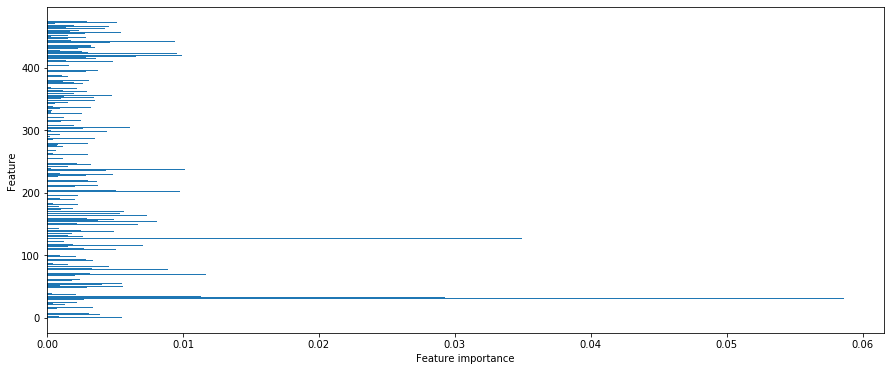

In [11]:
# 使用tree进行训练
tree = DecisionTreeClassifier(random_state=0)
tree.fit(Year, year_t)
# 对feature importance的值画统计图
plot_feature_importances_cancer(tree)
# 挑选出Feature importance大于0.001的特征
tree_result = tree.feature_importances_
tree_result_index = np.where(tree_result > 0.001)

Year_keys = np.array(Year.keys())

Year = set_important_feature(Year, tree_result_index)
yuce = set_important_feature(yuce, tree_result_index)
print("\n选中的特征为：", Year_keys[tree_result_index[0]])
Year = Year.iloc[:, 0:len(tree_result_index[0])+2]
yuce = yuce.iloc[:, 0:len(tree_result_index[0])+2]

导入基础数据

In [12]:
data_basic = pd.read_csv('基础数据.csv' , encoding='GBK')
Basic = data_basic.iloc[:, 0:2]
Basic

,股票编号,上市年限
0,1,26
1,2,1
2,3,17
3,4,22
4,5,1
...,...,...
3461,3462,18
3462,3463,7
3463,3464,19
3464,3465,11


对基础数据的所属行业这一特征进行编码

In [13]:
s = pd.Series(list(data_basic.iloc[:, 2]))
bianma = pd.get_dummies(s, sparse = True)
Basic = pd.concat([Basic, bianma],axis=1)
Basic

,股票编号,上市年限,交通运输、仓储和邮政业,住宿和餐饮业,信息传输、软件和信息技术服务业,农、林、牧、渔业,制造业,卫生和社会工作,建筑业,房地产业,批发和零售业,教育,文化、体育和娱乐业,水利、环境和公共设施管理业,电力、热力、燃气及水生产和供应业,科学研究和技术服务业,租赁和商务服务业,综合,采矿业,金融业
0,1,26,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,3462,18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3462,3463,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3463,3464,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3464,3465,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


对数据集进行拼接

In [14]:
total = pd.merge(Year, Basic, left_on = ['股票编号'], right_on = ['股票编号'])
yuce_total = pd.merge(yuce, Basic, left_on = ['股票编号'], right_on = ['股票编号'])

In [15]:
total

,股票编号,年份（年末）,固定资产合计,无息流动负债_x,无息非流动负债_x,带息流动负债,带息债务,有形净资产,净营运资本_x,留存收益_x,...,批发和零售业,教育,文化、体育和娱乐业,水利、环境和公共设施管理业,电力、热力、燃气及水生产和供应业,科学研究和技术服务业,租赁和商务服务业,综合,采矿业,金融业
0,1.0,1.0,0.000095,0.001964,0.031473,0.001209,0.001094,0.026402,0.271954,0.017283,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2.0,0.000086,0.002588,0.031407,0.000553,0.000521,0.026530,0.271377,0.017497,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3.0,0.000082,0.001996,0.031367,0.000537,0.000636,0.026663,0.271672,0.017698,...,0,0,0,0,0,0,0,0,0,0
3,1.0,4.0,0.000070,0.001921,0.031337,0.000155,0.000374,0.026772,0.272021,0.017877,...,0,0,0,0,0,0,0,0,0,0
4,1.0,5.0,0.000094,0.002544,0.031325,0.000191,0.000363,0.026776,0.271837,0.017895,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19081,3466.0,2.0,0.000129,0.000254,0.030570,0.000057,0.000051,0.026111,0.270851,0.017034,...,0,0,0,0,0,0,0,0,0,0
19082,3466.0,3.0,0.000191,0.000239,0.030631,0.000097,0.000087,0.026115,0.270844,0.017041,...,0,0,0,0,0,0,0,0,0,0
19083,3466.0,4.0,0.000183,0.000253,0.030618,0.000034,0.000031,0.026185,0.270901,0.017057,...,0,0,0,0,0,0,0,0,0,0
19084,3466.0,5.0,0.000178,0.000226,0.030616,0.000021,0.000019,0.026175,0.271024,0.017061,...,0,0,0,0,0,0,0,0,0,0


In [16]:
total = pd.concat([total, year_t],axis=1)
total

,股票编号,年份（年末）,固定资产合计,无息流动负债_x,无息非流动负债_x,带息流动负债,带息债务,有形净资产,净营运资本_x,留存收益_x,...,教育,文化、体育和娱乐业,水利、环境和公共设施管理业,电力、热力、燃气及水生产和供应业,科学研究和技术服务业,租赁和商务服务业,综合,采矿业,金融业,是否高转送
0,1.0,1.0,0.000095,0.001964,0.031473,0.001209,0.001094,0.026402,0.271954,0.017283,...,0,0,0,0,0,0,0,0,0,0.0
1,1.0,2.0,0.000086,0.002588,0.031407,0.000553,0.000521,0.026530,0.271377,0.017497,...,0,0,0,0,0,0,0,0,0,0.0
2,1.0,3.0,0.000082,0.001996,0.031367,0.000537,0.000636,0.026663,0.271672,0.017698,...,0,0,0,0,0,0,0,0,0,0.0
3,1.0,4.0,0.000070,0.001921,0.031337,0.000155,0.000374,0.026772,0.272021,0.017877,...,0,0,0,0,0,0,0,0,0,0.0
4,1.0,5.0,0.000094,0.002544,0.031325,0.000191,0.000363,0.026776,0.271837,0.017895,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19081,3466.0,2.0,0.000129,0.000254,0.030570,0.000057,0.000051,0.026111,0.270851,0.017034,...,0,0,0,0,0,0,0,0,0,0.0
19082,3466.0,3.0,0.000191,0.000239,0.030631,0.000097,0.000087,0.026115,0.270844,0.017041,...,0,0,0,0,0,0,0,0,0,0.0
19083,3466.0,4.0,0.000183,0.000253,0.030618,0.000034,0.000031,0.026185,0.270901,0.017057,...,0,0,0,0,0,0,0,0,0,0.0
19084,3466.0,5.0,0.000178,0.000226,0.030616,0.000021,0.000019,0.026175,0.271024,0.017061,...,0,0,0,0,0,0,0,0,0,0.0


In [17]:
yuce_total

,股票编号,年份（年末）,固定资产合计,无息流动负债_x,无息非流动负债_x,带息流动负债,带息债务,有形净资产,净营运资本_x,留存收益_x,...,批发和零售业,教育,文化、体育和娱乐业,水利、环境和公共设施管理业,电力、热力、燃气及水生产和供应业,科学研究和技术服务业,租赁和商务服务业,综合,采矿业,金融业
0,1.0,8.0,0.000112,0.004107,0.030916,2.949853e-10,1.323016e-06,0.027455,0.269011,0.018835,...,0,0,0,0,0,0,0,0,0,0
1,2.0,8.0,0.000131,0.000166,0.030559,8.423782e-06,7.554662e-06,0.026205,0.271052,0.017088,...,0,0,0,0,0,0,0,0,0,0
2,3.0,8.0,0.002344,0.000580,0.031008,2.356737e-04,4.428396e-04,0.027076,0.271073,0.017073,...,0,0,0,0,0,0,0,0,0,0
3,4.0,8.0,0.001243,0.000849,0.030579,5.714487e-04,5.779659e-04,0.026253,0.270085,0.017125,...,1,0,0,0,0,0,0,0,0,0
4,5.0,8.0,0.000219,0.000206,0.030582,1.812837e-05,1.625798e-05,0.026255,0.271083,0.017139,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,3462.0,8.0,0.008338,0.003037,0.031456,4.046501e-03,4.987825e-03,0.029046,0.272986,0.019779,...,0,0,0,0,0,0,0,0,0,0
3458,3463.0,8.0,0.001208,0.001371,0.032931,7.020629e-04,6.296278e-04,0.027111,0.272683,0.017346,...,0,0,0,0,0,0,0,0,0,0
3459,3464.0,8.0,0.025247,0.011274,0.049614,4.862342e-02,4.583026e-02,0.025900,0.272341,0.018344,...,0,0,0,0,0,0,0,0,0,0
3460,3465.0,8.0,0.000000,0.000121,0.030539,2.949853e-10,2.645503e-10,0.102822,0.270754,0.068628,...,0,0,0,0,0,0,0,0,0,1


In [18]:
total.to_csv('作品附件一.csv', encoding='GBK',index=False)

In [19]:
yuce_total.to_csv('作品附件二.csv', encoding='GBK',index=False)

In [20]:
# 导入数据，将训练数据拆分
train = pd.read_csv('./作品附件一.csv',encoding='GBK')
predict_1 = pd.read_csv('./作品附件二.csv',encoding='GBK')
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [21]:
# 将数据分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
# 使用决策树建立模型
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5,random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [23]:
# 查看模型的精确度
print("Accuracy on training set: {:.5f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.5f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.87034
Accuracy on test set: 0.85708


In [24]:
# 使用模型进行预测
tree_predict=tree.predict(predict_1)

In [25]:
# 更改列名
k_1=pd.DataFrame(predict_1.iloc[:,0])
k_2=pd.DataFrame(tree_predict)
k_1.columns=['number']#股票编号
k_2.columns=['result']#预测结果
data = pd.DataFrame(pd.concat([k_1,k_2],axis = 1))  #要保存的数据
datafinally=data[data['result']==1]
datafinally=datafinally['number']

In [26]:
import os    #获取当前工作路径
import pandas as pd 
file = os.getcwd() + '\\作品测试结果.csv'    #保存文件位置，即当前工作路径下的csv文件
data = pd.DataFrame(pd.concat([k_1,k_2],axis = 1))  #要保存的数据
datafinally.to_csv(file, index=False)   #数据写入